# Exploratory Data Analysis (EDA) of "Historical Sales and Active Inventory"

#### EDA or Exploratory Data Analysis is the brainstorming stage of Machine Learning. It is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. It's very important for a data scientist to be able to understand the nature of the data without making assumptions.

#### The purpose of EDA is to use summary statistics and visualizations to better understand data, and find clues about the tendencies (the patterns and trends in the data) of the data, its quality and to formulate assumptions and the hypothesis of our analysis. At this stage, all the useful insights are drawn and correlations between the variables are understood.



#### EDA or Exploratory Data Analysis is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set.

#### The main objective is to cover how to:

####  1. Read and examine a dataset and classify variables by their type:  Quantitative vs. Categorical

####  2. Handle categorical variables with numerically coded values
####  3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset
####  4. Identify and treat missing values and remove dataset outliers
####  5. Build a correlation matrix to identify relevant variables

#### The dataset contains a detailed set of products in an inventory and the main problem statement here is to determine the products that should continue to sell, and which products to remove from the inventory.
#### The file contains the observations of both historical sales and active inventory data.
#### The end solution here is to create a model that will predict which products to keep and which to remove from the inventory 
#### we’ll perform EDA on this data to understand the data better.

## Content
#### The file contains historical sales data (identified with the column titled File_Type) along with current active inventory that is in need of evaluation (i.e., File Type = "Active").
#### The historical data shows sales for the past 6 months. The binary target (1 = sale, 0 = no sale in past six months) is likely the primary target that should drive the analysis.
#### The other columns contain numeric and categorical attributes that we deem relevant to sales.
#### Note that some of the historical sales SKUs are ALSO included in the active inventory.
#### A few comments about the attributes included, as we realize we may have some attributes that are unnecessary or may need to be explained.
#### --> SKU_number: This is the unique identifier for each product.
#### --> Order: Just a sequential counter. Can be ignored.
#### --> SoldFlag: 1 = sold in past 6 mos. 0 = Not sold
#### --> MarketingType = Two categories of how we market the product. This should probably be ignored, or better yet, each type should be considered independently.
#### --> New_Release_Flag = Any product that has had a future release (i.e., Release Number > 1)

### Import the Required Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

### Read the Data

In [2]:
df = pd.read_csv('SalesKaggle3.csv')

## here we have stored our dataframe into df
# Let us read the data

In [3]:
df.shape

## (no of rows , no of column)

(198924, 16)

In [4]:
df.head() 

## for top 5 rows

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,Number of Doors,Packing sizes,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,5,4,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,2,4,0.00,15.54
2,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,2,4,0.00,15.54
3,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,4,6,30.19,27.97
4,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,4,5,133.93,83.15


In [5]:
df.tail() 

## for bottom 5 rows

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,Number of Doors,Packing sizes,LowUserPrice,LowNetPrice
198919,208023,Active,109683,NaN,NaN,D,7,1,210186.8663,72.87,2006,54,3,5,8.46,60.59
198920,208024,Active,416462,NaN,NaN,D,8,1,455504.0650,247.00,2009,65,2,6,8.40,74.85
198921,208025,Active,658242,NaN,NaN,S,2,1,169274.5688,50.00,2012,23,5,6,23.98,32.62
198922,208026,Active,2538340,NaN,NaN,S,2,1,377526.6063,46.95,2001,23,5,2,27.42,37.89
198923,208027,Active,416662,NaN,NaN,D,15,1,118306.8275,120.00,2010,44,5,3,10.97,60.67


## Lets check the data type

In [6]:
df.dtypes

## int64 means discrete data
## float64 means continous data
## object means categorical data

Order                 int64
File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
Number of Doors       int64
Packing sizes         int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object

In [7]:
df.info()

## summary of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198924 entries, 0 to 198923
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198924 non-null  int64  
 1   File_Type         198924 non-null  object 
 2   SKU_number        198924 non-null  int64  
 3   SoldFlag          76002 non-null   float64
 4   SoldCount         76002 non-null   float64
 5   MarketingType     198924 non-null  object 
 6   ReleaseNumber     198924 non-null  int64  
 7   New_Release_Flag  198924 non-null  int64  
 8   StrengthFactor    198924 non-null  float64
 9   PriceReg          198924 non-null  float64
 10  ReleaseYear       198924 non-null  int64  
 11  ItemCount         198924 non-null  int64  
 12  Number of Doors   198924 non-null  int64  
 13  Packing sizes     198924 non-null  int64  
 14  LowUserPrice      198924 non-null  float64
 15  LowNetPrice       198924 non-null  float64
dtypes: float64(6), int64

In [8]:
df.count()

Order               198924
File_Type           198924
SKU_number          198924
SoldFlag             76002
SoldCount            76002
MarketingType       198924
ReleaseNumber       198924
New_Release_Flag    198924
StrengthFactor      198924
PriceReg            198924
ReleaseYear         198924
ItemCount           198924
Number of Doors     198924
Packing sizes       198924
LowUserPrice        198924
LowNetPrice         198924
dtype: int64

## Total Unique Value

In [9]:
df.nunique()

## gives only unique values 

Order               198917
File_Type                2
SKU_number          133363
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11629
ReleaseYear             85
ItemCount              501
Number of Doors          4
Packing sizes            5
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

## Let's check the summary of data

In [10]:
df.describe().T

## statsticall data (statsics)
## by defult showimg only numerical variables doesnt show categorical

,count,mean,std,min,25%,50%,75%,max
Order,198924.0,1.064816e+05,6.013800e+04,2.000,55662.75,108566.50000,1.582972e+05,208027.00
SKU_number,198924.0,8.613904e+05,8.700035e+05,50001.000,217254.00,612213.00000,9.047545e+05,3960788.00
SoldFlag,76002.0,1.710218e-01,3.765305e-01,0.000,0.00,0.00000,0.000000e+00,1.00
SoldCount,76002.0,3.223205e-01,1.168590e+00,0.000,0.00,0.00000,0.000000e+00,73.00
ReleaseNumber,198924.0,3.412223e+00,3.864200e+00,0.000,1.00,2.00000,5.000000e+00,99.00
New_Release_Flag,198924.0,6.422553e-01,4.793376e-01,0.000,0.00,1.00000,1.000000e+00,1.00
StrengthFactor,198924.0,1.117128e+06,1.522142e+06,6.275,161416.00,582220.02375,1.430072e+06,17384454.00
PriceReg,198924.0,9.089425e+01,8.673524e+01,0.000,42.00,69.95000,1.160000e+02,12671.48
ReleaseYear,198924.0,2.006016e+03,9.158211e+00,0.000,2003.00,2007.00000,2.011000e+03,2018.00
ItemCount,198924.0,4.142581e+01,3.754070e+01,0.000,21.00,32.00000,5.000000e+01,2542.00


In [11]:
df.describe(include='object')

## categorial data
## top = mode
## freq = no of mode occur

,File_Type,MarketingType
count,198924,198924
unique,2,2
top,Active,S
freq,122922,100949


In [12]:
df.describe(include='all').T

## all data statsical and catagorical
## NaN = dont have any meaning in that columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order,198924.0,NaN,NaN,NaN,106481.586807,60137.999392,2.0,55662.75,108566.5,158297.25,208027.0
File_Type,198924,2,Active,122922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU_number,198924.0,NaN,NaN,NaN,861390.376852,870003.457303,50001.0,217254.0,612213.0,904754.5,3960788.0
SoldFlag,76002.0,NaN,NaN,NaN,0.171022,0.376531,0.0,0.0,0.0,0.0,1.0
SoldCount,76002.0,NaN,NaN,NaN,0.32232,1.16859,0.0,0.0,0.0,0.0,73.0
MarketingType,198924,2,S,100949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ReleaseNumber,198924.0,NaN,NaN,NaN,3.412223,3.8642,0.0,1.0,2.0,5.0,99.0
New_Release_Flag,198924.0,NaN,NaN,NaN,0.642255,0.479338,0.0,0.0,1.0,1.0,1.0
StrengthFactor,198924.0,NaN,NaN,NaN,1117128.410375,1522141.923223,6.275,161416.0,582220.02375,1430071.96375,17384454.0
PriceReg,198924.0,NaN,NaN,NaN,90.894255,86.735243,0.0,42.0,69.95,116.0,12671.48


## Missing Value Imputation

In [13]:
df.isnull().sum()

## checking missing values in columns
## in this missing values is in 2 columns "sold_flag" & "soldcount"

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122922
SoldCount           122922
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
Number of Doors          0
Packing sizes            0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [14]:
print(df[df['File_Type'] == 'Historical']['SKU_number'].count())
print(df[df['File_Type'] == 'Active']['SKU_number'].count())

76002
122922


In [15]:
# Let us replace by the groupby of the soldflag, this may not look good but
# Here we want to learn that we can do groupby and then replace also

df['SoldFlag'].fillna(df.groupby('New_Release_Flag')['SoldFlag'].transform('max'),inplace = True)

In [16]:
df.groupby('SoldFlag')['SoldFlag'].count()

SoldFlag
0.0     63004
1.0    135920
Name: SoldFlag, dtype: int64

#### for numerical data - for checking missing values we use "mean" 
#### for catagorial data - for checking missing values we use "mode"

#### Sold_Flag - catagorial variable
#### SoldCount - numerical variable

In [17]:
df['SoldFlag'].mode()

0    1.0
dtype: float64

In [18]:
df['SoldFlag'].value_counts()

1.0    135920
0.0     63004
Name: SoldFlag, dtype: int64

In [19]:
df['SoldFlag'].fillna(0,inplace=True)

In [20]:
df['SoldCount'].fillna(df['SoldCount'].mean(),inplace=True)

In [21]:
df.isnull().sum()

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
Number of Doors     0
Packing sizes       0
LowUserPrice        0
LowNetPrice         0
dtype: int64

# Visualising Data

## Univariate Analysis

<AxesSubplot:xlabel='MarketingType', ylabel='count'>

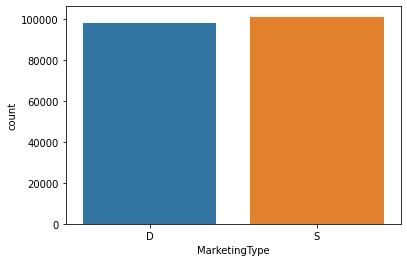

In [22]:
sns.countplot(x = 'MarketingType', data = df)

# Let us try to do the count by the categorical data columns

In [23]:
# Values of above graph
df['MarketingType'].value_counts()

S    100949
D     97975
Name: MarketingType, dtype: int64

<AxesSubplot:xlabel='File_Type', ylabel='count'>

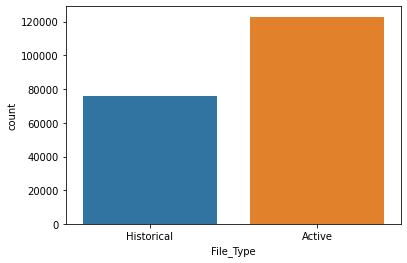

In [24]:
sns.countplot(x = 'File_Type', data = df)

In [25]:
# Let us get the value counts of file type

df['File_Type'].value_counts()

Active        122922
Historical     76002
Name: File_Type, dtype: int64

<AxesSubplot:xlabel='SoldFlag', ylabel='count'>

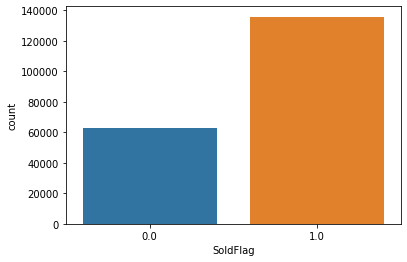

In [26]:
sns.countplot(x = 'SoldFlag', data = df)

In [27]:
# Values of above graph
df['SoldFlag'].value_counts()

1.0    135920
0.0     63004
Name: SoldFlag, dtype: int64

In [28]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='StrengthFactor', ylabel='Density'>

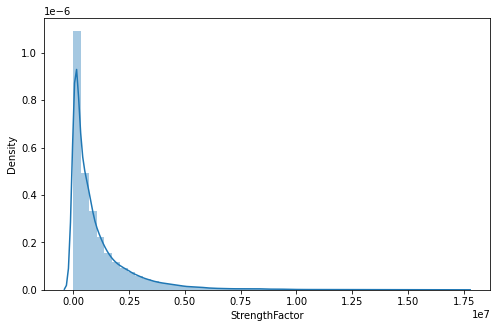

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['StrengthFactor'], hist=True)

<AxesSubplot:xlabel='PriceReg', ylabel='Density'>

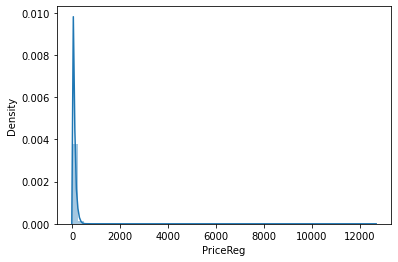

In [30]:
sns.distplot(df['PriceReg'], hist=True)

<AxesSubplot:xlabel='ReleaseYear', ylabel='Density'>

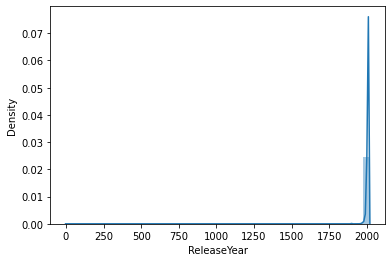

In [31]:
sns.distplot(df['ReleaseYear'])

<AxesSubplot:xlabel='ItemCount', ylabel='Density'>

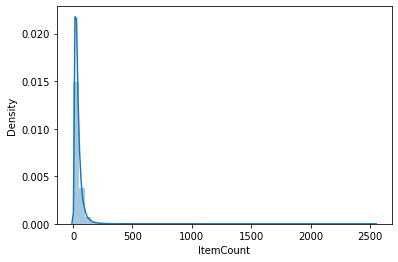

In [32]:
sns.distplot(df['ItemCount'])

<AxesSubplot:xlabel='LowUserPrice', ylabel='Density'>

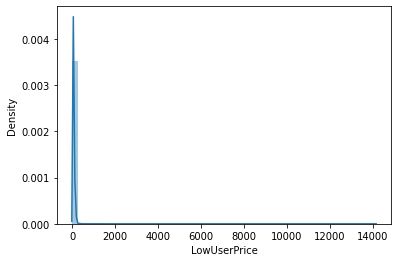

In [33]:
sns.distplot(df['LowUserPrice'])

<AxesSubplot:xlabel='LowNetPrice', ylabel='Density'>

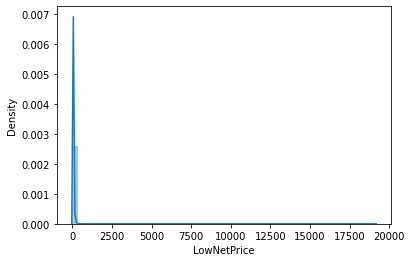

In [34]:
sns.distplot(df['LowNetPrice'])

## Bivariate Analysis

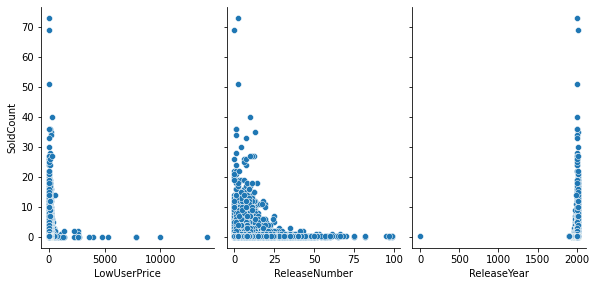

In [35]:
# Visualise the relationship between the features and the response using scatterplots
# As there is a lot of data just to show graph we have reduced the numbers

# In practice we will do our Y Vs the Multiple X graphs to understand its spread.


sns.pairplot(df, x_vars=['LowUserPrice','ReleaseNumber','ReleaseYear'], y_vars='SoldCount',size=4, aspect=0.7, kind='scatter')

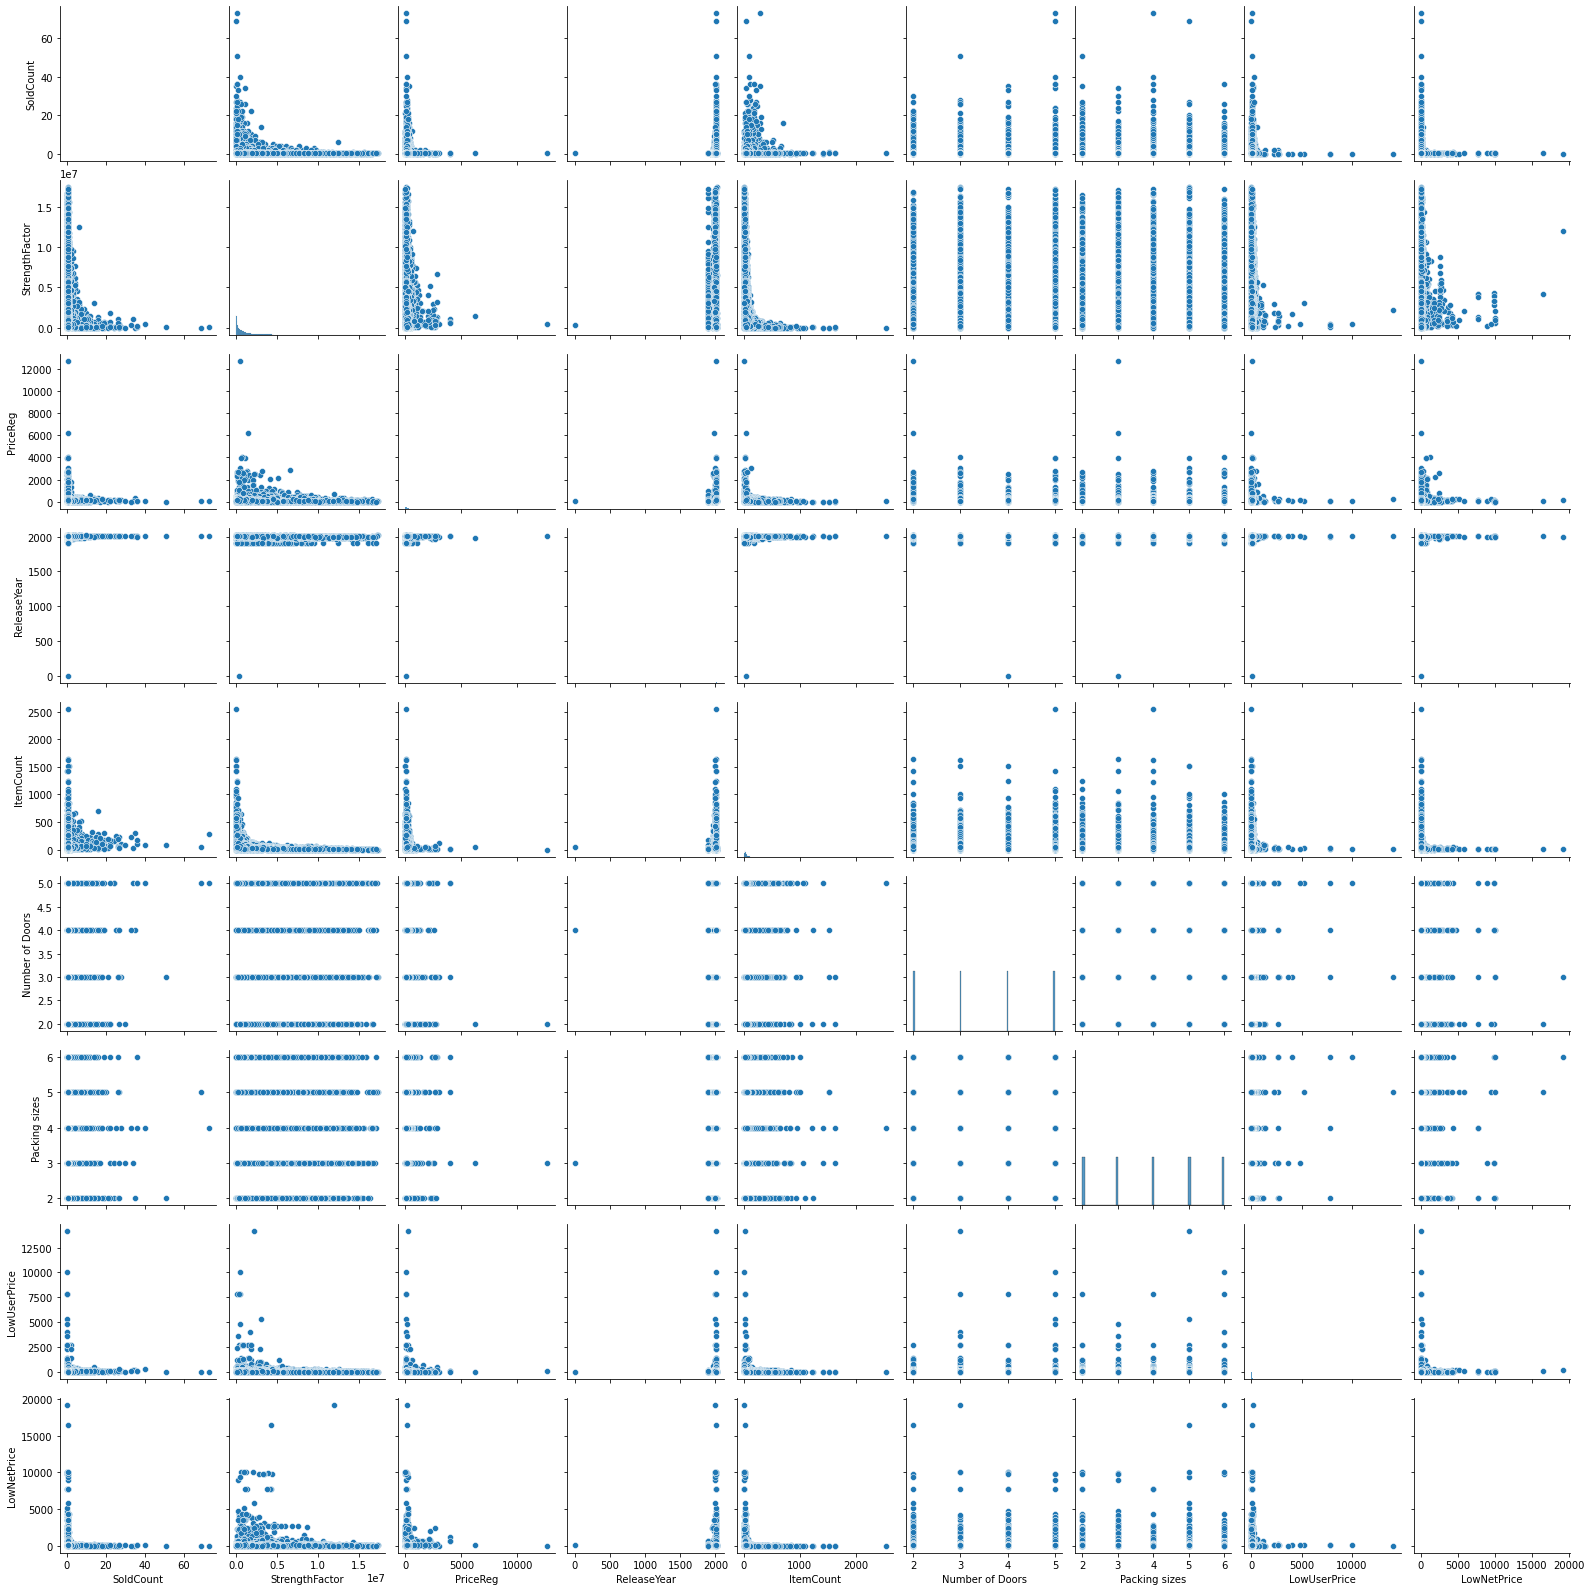

In [36]:
df = df.drop(['Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(df)

## Correlation

<AxesSubplot:>

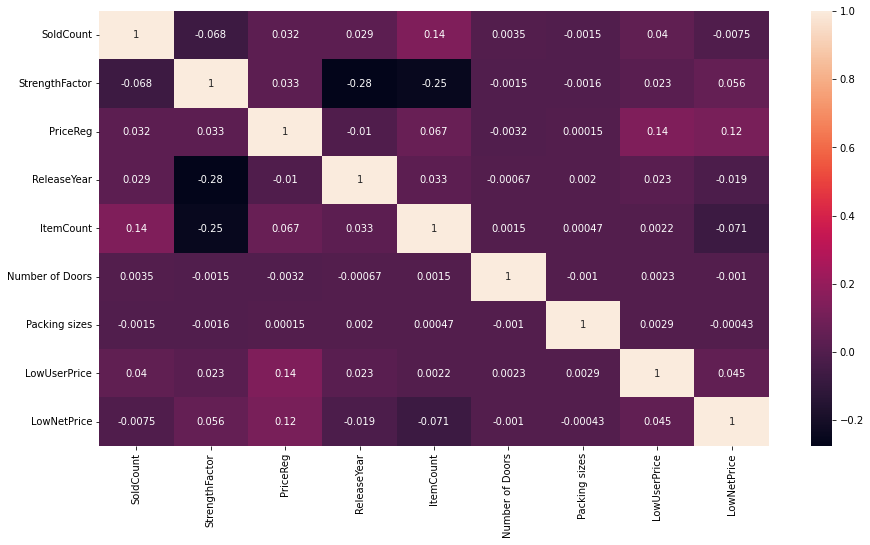

In [37]:
# Let us get the correlation in the data

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)

## Outlier Detection

<AxesSubplot:xlabel='ItemCount'>

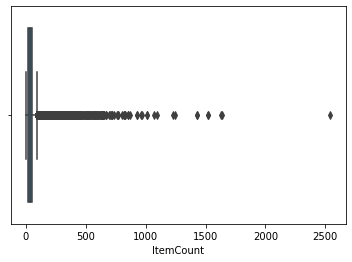

In [38]:
# This is kind of univatiate analysis if we are finding outliers in the data
# We can see there are a lot of outliers

sns.boxplot(x = 'ItemCount', data = df)

<AxesSubplot:xlabel='SoldCount'>

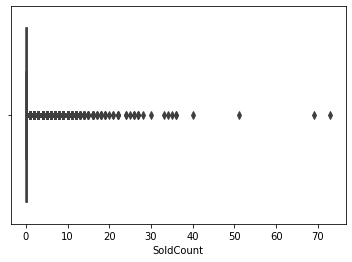

In [39]:
# Soldcout's Box Plot
sns.boxplot(x = 'SoldCount', data = df)

<AxesSubplot:xlabel='StrengthFactor'>

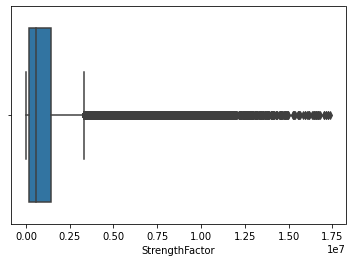

In [40]:
sns.boxplot(x = 'StrengthFactor', data = df)

<AxesSubplot:xlabel='PriceReg'>

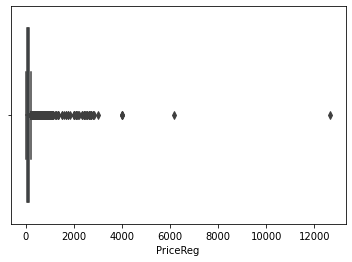

In [41]:
sns.boxplot(x = 'PriceReg', data = df)

<AxesSubplot:xlabel='ReleaseYear'>

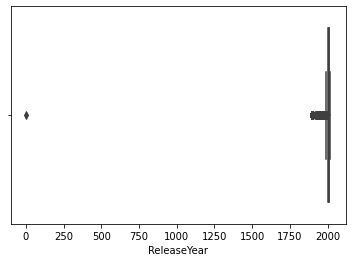

In [42]:
sns.boxplot(x = 'ReleaseYear', data = df)

<AxesSubplot:xlabel='ItemCount'>

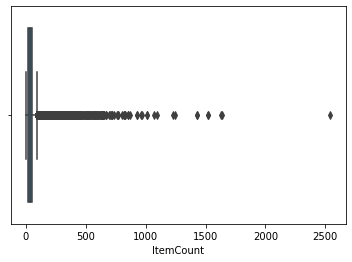

In [43]:
sns.boxplot(x = 'ItemCount', data = df)

<AxesSubplot:xlabel='LowUserPrice'>

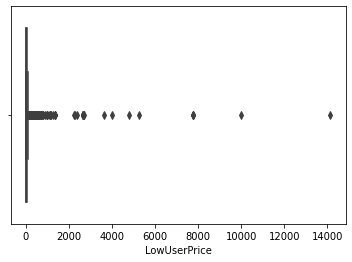

In [44]:
sns.boxplot(x = 'LowUserPrice', data = df)

<AxesSubplot:xlabel='LowNetPrice'>

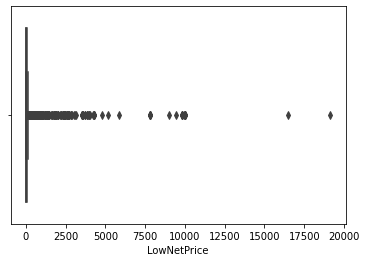

In [45]:
sns.boxplot(x = 'LowNetPrice', data = df)

## Handling Outlier

<AxesSubplot:xlabel='ItemCount'>

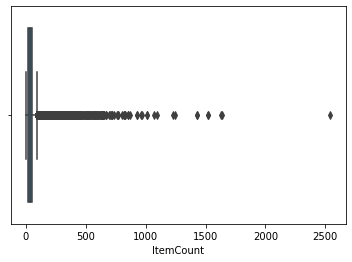

In [46]:
sns.boxplot(x = 'ItemCount', data = df)

In [47]:
df[df['ItemCount']>1500]

,SoldCount,StrengthFactor,PriceReg,ReleaseYear,ItemCount,Number of Doors,Packing sizes,LowUserPrice,LowNetPrice
74281,1.00000,222.00000,12.00,1994,1523,3,5,10.49,6.66
98502,0.32232,12411.99625,13.99,2004,1634,2,3,3.92,0.00
117621,0.32232,35108.33500,27.95,2001,1631,3,4,4.00,5.09
125458,0.32232,17650.02750,21.99,2002,2542,5,4,3.00,4.83
195051,0.32232,209.35000,12.00,1994,1523,4,5,4.00,6.66


In [48]:
df.drop([74281,98502,117621,125458,195051], inplace=True)

# Deleting the outlier

<AxesSubplot:xlabel='ItemCount'>

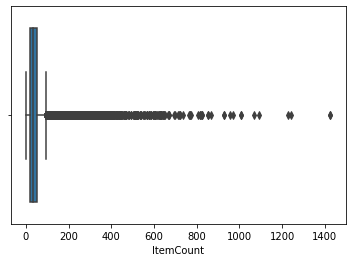

In [49]:
sns.boxplot(x = 'ItemCount', data = df)

#### It is always better to explore each data set using multiple exploratory techniques and compare the results. Once the data set is fully understood, it is quite possible that data scientist will have to go back to data collection and cleansing phases in order to transform the data set according to the desired business outcomes. The goal of this step is to become confident that the data set is ready to be used in a machine learning algorithm.

#### It is always better to explore each data set using multiple exploratory techniques and compare the results. The goal of this step is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions or areas of research for your project.